## Data Preprocessing

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [3]:
data = pd.read_csv(r'Parkinsons Train Data_3.csv', header=0)

In [4]:
data.head()

,Jitter(local),"Jitter(local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, db)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,status
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1


In [5]:
data.shape

(1036, 27)

In [6]:
data.index

RangeIndex(start=0, stop=1036, step=1)

In [7]:
data.columns

Index(['Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)',
       'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)',
       'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)',
       'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM', 'Median Pitch',
       'Mean Pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch',
       'Number of pulses', 'Number of periods', 'Mean period',
       'Standard deviation of period', 'Fraction of locally unvoiced frames',
       'Number of voice breaks', 'Degree of voice breaks', 'status'],
      dtype='object')

### Checking for null values (missing values)

In [7]:
data.isnull().sum()

Jitter(local)                          0
Jitter(local, absolute)                0
Jitter (rap)                           0
Jitter (ppq5)                          0
Jitter (ddp)                           0
Shimmer (local)                        0
Shimmer (local, db)                    0
Shimmer (apq3)                         0
Shimmer (apq5)                         0
Shimmer (apq11)                        0
Shimmer (dda)                          0
AC                                     0
NDH                                    0
HTM                                    0
Median Pitch                           0
Mean Pitch                             0
Standard deviation                     0
Minimum pitch                          0
Maximum pitch                          0
Number of pulses                       0
Number of periods                      0
Mean period                            0
Standard deviation of period           0
Fraction of locally unvoiced frames    0
Number of voice 

### Selecting independent and dependent variables

In [8]:
X = data.loc[:, data.columns != 'status'].values
y = data.loc[:, 'status'].values

### Spliting the dataset for training and testing

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 12)

In [10]:
X_train

array([[2.29400e+00, 2.23757e-04, 8.52000e-01, ..., 3.67350e+01,
        1.00000e+00, 3.05580e+01],
       [9.87000e-01, 4.15600e-05, 3.33000e-01, ..., 1.93550e+01,
        0.00000e+00, 0.00000e+00],
       [7.22800e+00, 4.01059e-04, 3.95300e+00, ..., 5.06670e+01,
        2.00000e+00, 1.88440e+01],
       ...,
       [1.03700e+00, 7.75070e-05, 5.27000e-01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.21900e+00, 8.18590e-05, 7.41000e-01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.26800e+00, 3.00057e-04, 2.02600e+00, ..., 2.50000e+01,
        6.00000e+00, 2.30260e+01]])

In [11]:
X_test

array([[1.28900e+00, 7.31470e-05, 6.23000e-01, ..., 3.50650e+01,
        1.00000e+00, 1.87490e+01],
       [3.32600e+00, 1.80944e-04, 1.66600e+00, ..., 4.16670e+01,
        1.00000e+00, 4.32260e+01],
       [1.74400e+00, 1.22739e-04, 4.09000e-01, ..., 4.00000e+01,
        1.00000e+00, 2.73550e+01],
       ...,
       [5.00000e-01, 2.71960e-05, 2.09000e-01, ..., 3.03030e+01,
        0.00000e+00, 0.00000e+00],
       [3.96200e+00, 2.13240e-04, 1.80400e+00, ..., 5.70590e+01,
        7.00000e+00, 5.42470e+01],
       [2.96000e-01, 2.03310e-05, 9.80000e-02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [12]:
y_train

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [13]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

### Limiting the range of variables -> to compare them commonly

In [12]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()

In [13]:
X_train = standard_X.fit_transform(X_train)
X_test = standard_X.fit_transform(X_test)

In [16]:
X_train

array([[-0.22521454,  0.46680385, -0.40640902, ...,  0.42401686,
        -0.0711297 ,  1.21206042],
       [-0.95579884, -1.19694106, -0.92792881, ..., -0.40197721,
        -0.70984537, -0.81306889],
       [ 2.53278311,  2.08584972,  2.70964657, ...,  1.08614282,
         0.56758597,  0.43575422],
       ...,
       [-0.92784994, -0.86868846, -0.73298692, ..., -1.32183423,
        -0.70984537, -0.81306889],
       [-0.82611593, -0.82894786, -0.51794794, ..., -1.32183423,
        -0.70984537, -0.81306889],
       [ 0.87820811,  1.16354275,  0.77329084, ..., -0.13369548,
         3.12244864,  0.71290229]])

## Random Forest

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
y_pred = model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\n")

print("Classfications Results")
print(classification_report(y_test, y_pred))
print("\n")

print("Accuracy Score")
print(accuracy_score(y_test, y_pred))
print()

print(model.feature_importances_)

Confusion Matrix
[[47 30]
 [24 55]]


Classfications Results
              precision    recall  f1-score   support

           0       0.66      0.61      0.64        77
           1       0.65      0.70      0.67        79

    accuracy                           0.65       156
   macro avg       0.65      0.65      0.65       156
weighted avg       0.65      0.65      0.65       156



Accuracy Score
0.6538461538461539

[0.03183916 0.03907095 0.0388915  0.04749364 0.0405843  0.03569386
 0.03053835 0.03090701 0.03623642 0.04784713 0.03344811 0.03619175
 0.03562605 0.03653068 0.04646356 0.04459591 0.05735417 0.03988354
 0.0620382  0.03486711 0.03701013 0.03747059 0.03559379 0.04901165
 0.00966672 0.02514573]


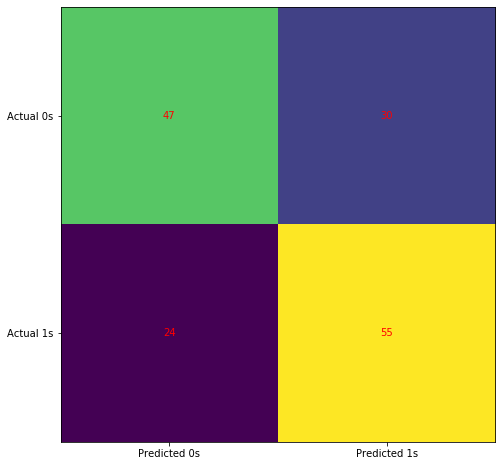

In [20]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Saving the model

In [21]:
import joblib
filename = 'Random Forest.sav'
joblib.dump(model, filename)

['Random Forest.sav']

In [31]:
import pandas as pd
pred_data = pd.read_csv(r'Book1.csv')
pred_data=pred_data.dropna()
print(pred_data.shape)
print(list(pred_data.columns))
pred_data.head()

(1, 26)
['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25']


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25
0,2.797,0.00015,1.05,1.138,3.151,8.534,0.873,2.94,3.933,9.911,...,95.79,127.185,493.978,65,62,0.005377,0.001898,38.596,2,39.725


In [32]:
pred_cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21','f22', 'f23', 'f24', 'f25' ]
pred_X = pred_data[pred_cols]
pred_X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25
0,2.797,0.00015,1.05,1.138,3.151,8.534,0.873,2.94,3.933,9.911,...,95.79,127.185,493.978,65,62,0.005377,0.001898,38.596,2,39.725


In [33]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()
pred_X = standard_X.fit_transform(pred_X)

In [34]:
pred_y = model.predict(pred_X)
res = pd.DataFrame(pred_y)
res.columns = ["status"]
res.to_csv("Random Trees - test_3.csv")
#100% accuracy when testing the dataset.